# SEN163A - Responsible Data Analytics
## Lab session 3: Preprocessing, Regression and Correlation analysis
### Delft University of Technology
### Q3 2022

**Instructor**: Dr. Ir. Jacopo De Stefani - J.deStefani@tudelft.nl

**TAs**: Antonio Sanchez Martin - A.SanchezMartin@student.tudelft.nl

#### Instructions

Lab session aim to:
- Show and reinforce how models and ideas presented in class are put to practice.
- Help you gather hands-on machine learning skills.

Lab sessions are:

- Learning environments where you work with Jupyter notebooks and where you can get support from TAs and fellow students.
- Not graded and do not have to be submitted.
- A good preparation for the assignments (which are graded).


### Application: Diagnostic analysis of a sleep dataset

In this lab session, we will explore how to combine multiple datasets related to personal health and sleep data, execute some data quality check and improvements, and finally perform regression and correlation analysis.
The example dataset is an extract from a study relating the sleep quality, to both some physiological quantities (e.g. age, gender, consumption of substances) as well as sleep measurement data.

#### Learning objectives
After completing the following exercises you will be able to:

1. Apply common preprocessing techniques to improve data quality: imputation, outlier removal and integrity checks
2. Apply feature engineering techniques: binning and feature multiplications
3. Merge multiple data sources to improve your analysis capabilities 
3. Perform a regression analysis and the corresponding statistical testing
4. Perform a correlation analysis and the corresponding statistical testing


## Activity 1 - Data preprocessing

Prior to any kind of further analysis, we need to perform some data quality check and address eventual issues that the data might have.

We are going to work with two datasets in the `sleep_data` directory:
- `personal_data.csv` : Containing personal informations about the different persons involved in the study
- `sleep_data.csv` : Containing sleep measurement about the different persons involved in the study


In [1]:
import pandas
import numpy

import seaborn
import matplotlib

seaborn.set_palette("Set2")
seaborn.color_palette("Set2")

#
seaborn.set(rc={"figure.figsize":(15, 10),
            'legend.title_fontsize' : 25,
            'legend.fontsize' : 20,
            'xtick.labelsize' : 20,
            'ytick.labelsize' : 20,
            'axes.labelsize' : 25})

In [2]:
seaborn.set_context('notebook')
#sns.set_context('paper')
#sns.set_context('talk')
#sns.set_context('poster')

### Activity 1.1

Once you have imported the file containing personal data `personal_data.csv`, check whether all the columns are complete.

If there are any columns with missing data, how would you propose to deal with them?

Check the [Pandas documentation for missing data for any help](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

In [3]:
personal_data_df = pandas.read_csv("data/sleep_data/personal_data.csv",index_col=0)

In [4]:
personal_data_df.describe()

,ID,Age,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,23.653396,1.173516,1.791480
std,130.625419,13.172250,30.202785,1.621377,1.428134
min,1.000000,9.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,200.000000,5.000000,5.000000


Let's check whose columns contains at least one missing value (using the `isnull()` function):

In [5]:
personal_data_df.columns[personal_data_df.isnull().any()]

Index(['Caffeine consumption', 'Alcohol consumption', 'Exercise frequency'], dtype='object')

Let's then explore each of the different columns displaying missing data to understand a bit more about the causes of missing data:

In [6]:
personal_data_df["Caffeine consumption"]

0       0.0
1       0.0
2       0.0
3      50.0
4       0.0
       ... 
447     0.0
448    25.0
449     NaN
450     0.0
451    50.0
Name: Caffeine consumption, Length: 452, dtype: float64

For the `Caffeine consumption` variable, we are going to have a look to the other columns without missing values to assess the existence of a specific pattern that might indicate systematic reasons for data missingness:

In [7]:
personal_data_df[personal_data_df["Caffeine consumption"].isna()]

,ID,Age,Gender,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
5,6,36,Female,NaN,0.0,No,1.0
24,25,24,Male,NaN,5.0,No,2.0
26,27,36,Female,NaN,0.0,No,1.0
37,38,20,Female,NaN,0.0,No,1.0
57,58,43,Male,NaN,0.0,Yes,3.0
60,61,32,Female,NaN,0.0,No,1.0
63,64,35,Female,NaN,0.0,No,1.0
64,65,30,Male,NaN,0.0,No,3.0
114,115,32,Male,NaN,0.0,Yes,1.0
136,137,52,Male,NaN,3.0,Yes,1.0


There does not seem to be any specific pattern/column combination, which suggests the hypothesis of Missing Completely at Random data (MCAR).
Further testing using Little's MCAR statistical test should be needed to confirm this hypothesis, but this will be outside the scope of the practical.

To cope with this data, we simply decide to replace missing values with 0, as:
1. It is a reasonable assumption to set to zero the values that are absent
2. 0 will not (numerically) impact further statistical analysis on the dataset 

In [8]:
personal_data_df["Caffeine consumption"] = personal_data_df["Caffeine consumption"].fillna(0)

We repeat the same procedure and the same missing value imputation for the `Alcohol consumption` and `Exercise frequency` as well.

In [9]:
personal_data_df[personal_data_df["Alcohol consumption"].isna()][["Age","Gender","Alcohol consumption"]]

,Age,Gender,Alcohol consumption
20,24,Male,NaN
75,44,Male,NaN
129,25,Male,NaN
140,37,Female,NaN
148,26,Female,NaN
185,36,Female,NaN
187,27,Male,NaN
192,24,Male,NaN
336,50,Female,NaN
395,56,Male,NaN


In [10]:
personal_data_df["Alcohol consumption"] = personal_data_df["Alcohol consumption"].fillna(0)
personal_data_df["Exercise frequency"] = personal_data_df["Exercise frequency"].fillna(0)

Finally, as an example, we showcase the impact of alternative imputation methods:

- `fillna` replaces missing values 'NA'/'NaN' with a value provided by the user (0 here)
- `dropna` removes all the rows containing at least one missing value in each column

We can observe, by looking at the `Non-Null Count` column, that removing missing values considerabily reduces the number of available rows. 


In [11]:
personal_data_df.fillna(0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 451
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    452 non-null    int64  
 1   Age                   452 non-null    int64  
 2   Gender                452 non-null    object 
 3   Caffeine consumption  452 non-null    float64
 4   Alcohol consumption   452 non-null    float64
 5   Smoking status        452 non-null    object 
 6   Exercise frequency    452 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 28.2+ KB


In [12]:
personal_data_df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 451
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    452 non-null    int64  
 1   Age                   452 non-null    int64  
 2   Gender                452 non-null    object 
 3   Caffeine consumption  452 non-null    float64
 4   Alcohol consumption   452 non-null    float64
 5   Smoking status        452 non-null    object 
 6   Exercise frequency    452 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 28.2+ KB


### Activity 1.2

After having performed data cleaning, bin the age variable in bins of 10 years each.


In [13]:
bins = [-numpy.inf, 0, 10, 20, 30, 40, 50, 60, 70, +numpy.inf]
personal_data_df["Age Bins"] = pandas.cut(personal_data_df["Age"], bins)

In [14]:
personal_data_df.head()

,ID,Age,Gender,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age Bins
0,1,65,Female,0.0,0.0,Yes,3.0,"(60.0, 70.0]"
1,2,69,Male,0.0,3.0,Yes,3.0,"(60.0, 70.0]"
2,3,40,Female,0.0,0.0,No,3.0,"(30.0, 40.0]"
3,4,40,Female,50.0,5.0,Yes,1.0,"(30.0, 40.0]"
4,5,57,Male,0.0,3.0,No,3.0,"(50.0, 60.0]"


### Activity 1.3

With the cleaned data, perform exploratory data visualization to assess if there outliers/inconsistent data, for instance:

- Are there any children smoking?
- Are there any children consuming alcohol?

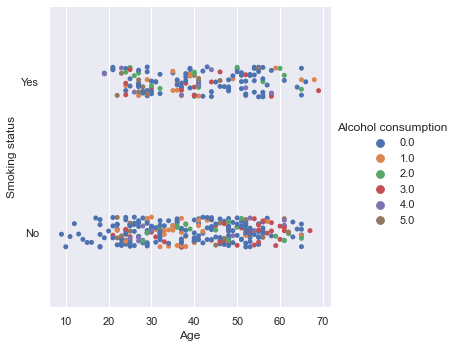

In [15]:
seaborn.catplot(data=personal_data_df,x="Age", y="Smoking status",hue="Alcohol consumption")

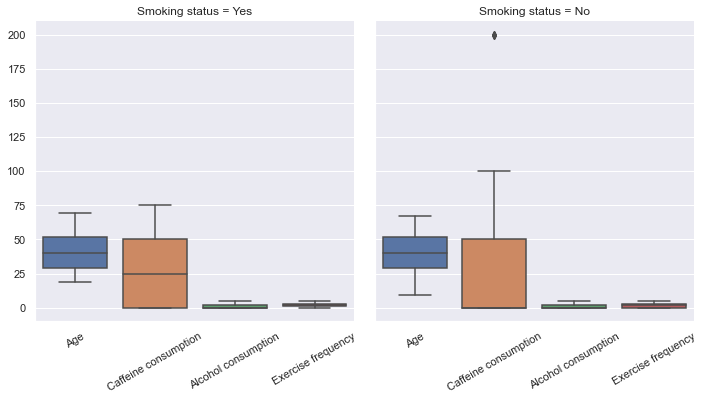

In [16]:
#sns.boxplot(data=personal_data_df.iloc[: , 1:])
chart = seaborn.catplot(data=personal_data_df.iloc[: , 1:],col="Smoking status",kind="box")
chart.set_xticklabels(rotation=30)
chart

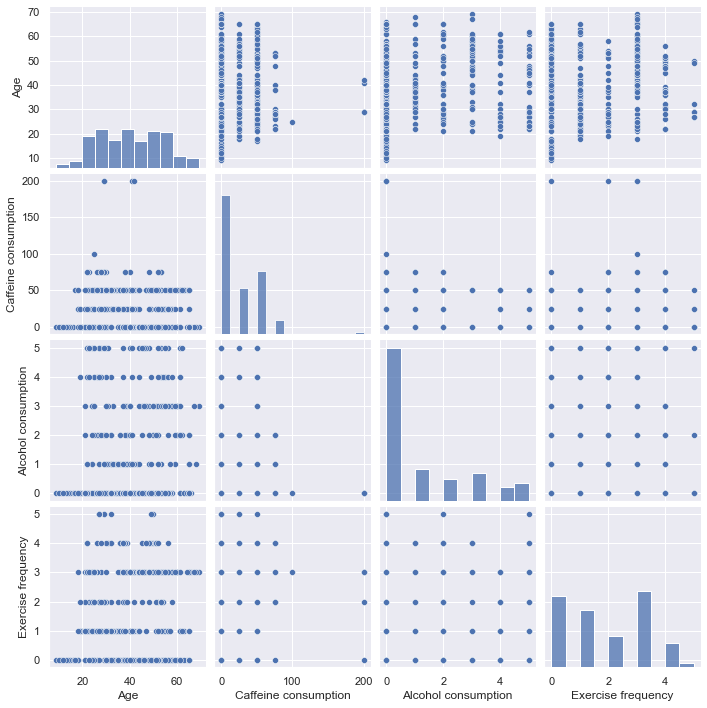

In [17]:
seaborn.pairplot(personal_data_df[['Age','Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']]);

### Activity 1.4

Let's proceed with the similar data quality checks for the `sleep_data.csv` dataset.

If there are any columns with missing data, how would you propose to deal with them?

Check the [Pandas documentation for missing data for any help](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).


In [18]:
sleep_data_df = pandas.read_csv("data/sleep_data/sleep_data.csv",index_col=0)

In [19]:
sleep_data_df.columns[sleep_data_df.isnull().any()]

Index(['Awakenings'], dtype='object')

In [20]:
sleep_data_df[sleep_data_df["Awakenings"].isna()]

,ID,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings
19,20,2021-12-03 00:30:00,2021-12-03 07:30:00,7.0,0.89,28,52,20,NaN
85,86,2021-11-06 23:00:00,2021-11-06 06:30:00,7.5,0.88,18,65,17,NaN
123,124,2021-10-05 01:30:00,2021-10-05 10:00:00,8.5,0.91,20,67,13,NaN
135,136,2021-02-03 00:00:00,2021-02-03 07:00:00,7.0,0.82,20,65,15,NaN
138,139,2021-03-01 02:30:00,2021-03-01 10:00:00,7.5,0.83,23,58,19,NaN
143,144,2021-04-21 21:30:00,2021-04-21 04:30:00,7.0,0.87,27,55,18,NaN
149,150,2021-09-30 02:30:00,2021-09-30 10:00:00,7.5,0.60,24,25,51,NaN
170,171,2021-10-20 21:30:00,2021-10-20 05:30:00,8.0,0.89,27,55,18,NaN
244,245,2021-01-08 22:00:00,2021-01-08 05:00:00,7.0,0.92,24,59,17,NaN
249,250,2021-04-04 00:30:00,2021-04-04 10:30:00,10.0,0.66,19,28,53,NaN


In a similar fashion as the previous case, there does not seem to be a specific pattern ambong the missing values, hence we could assume Missing Data Completely at Random (to be verified with Little's MCAR test).
Nevertheless, in this case, `Awakenings` has a strong impact on the sleep efficiency (less awakenings generally yield to a better sleep efficiency):  

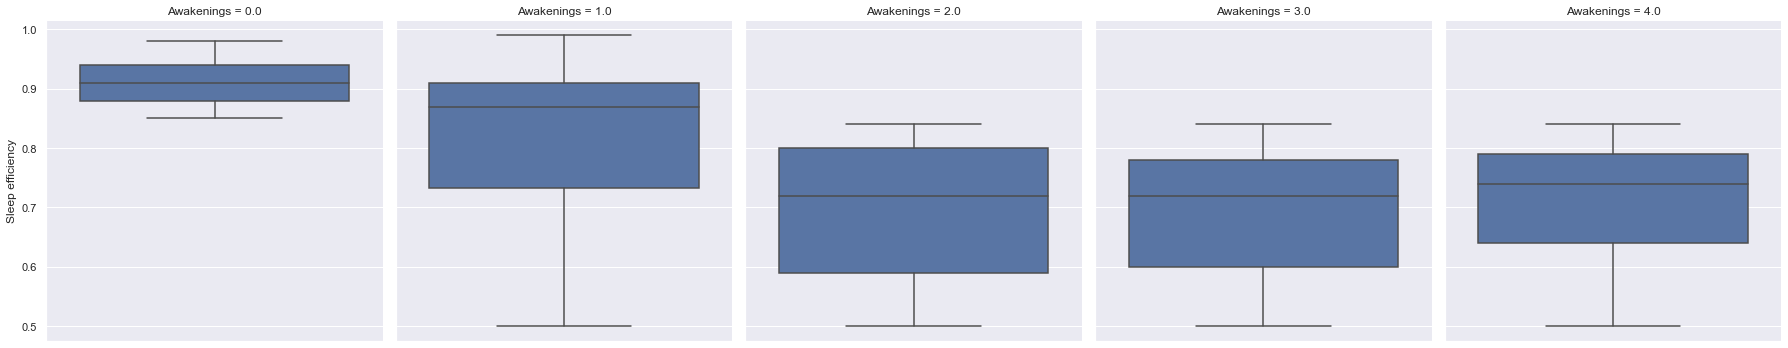

In [21]:
seaborn.catplot(data=sleep_data_df.iloc[: , 1:],y="Sleep efficiency", col="Awakenings",kind="box")

If we look at the boxplot for the same metric, for the missing values, we see a completely different picture with respect to the case with zero awakenings.
In this case, it would be better to drop the missing data, or rather impute with 1, as the distribution of missing values looks the most similar to the one having 1 awakening.

<AxesSubplot:ylabel='Sleep efficiency'>

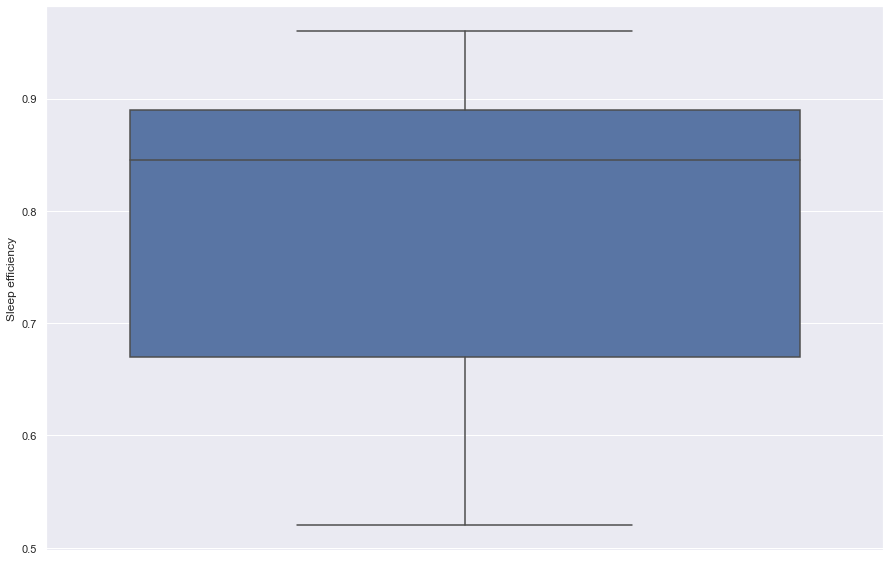

In [22]:
seaborn.boxplot(data=sleep_data_df[sleep_data_df["Awakenings"].isna()], y="Sleep efficiency")

In [23]:
sleep_data_df = sleep_data_df.dropna()

### Activity 1.5

Convert the bed time and wakeup time columns to datetime and perform a consistency check on the data with respect to the sleep duration variable: Do the two values correspond?


In [24]:
sleep_data_df.head()

,ID,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings
0,1,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0
1,2,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0
2,3,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0
3,4,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0
4,5,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0


In [25]:
sleep_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 451
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      432 non-null    int64  
 1   Bedtime                 432 non-null    object 
 2   Wakeup time             432 non-null    object 
 3   Sleep duration          432 non-null    float64
 4   Sleep efficiency        432 non-null    float64
 5   REM sleep percentage    432 non-null    int64  
 6   Deep sleep percentage   432 non-null    int64  
 7   Light sleep percentage  432 non-null    int64  
 8   Awakenings              432 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 33.8+ KB


In [26]:
sleep_data_df.describe()

,ID,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,225.567130,7.454861,0.788796,22.601852,52.967593,24.430556,1.641204
std,131.211684,0.866855,0.135773,3.558434,15.599508,15.251177,1.356762
min,1.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000
25%,110.750000,7.000000,0.700000,20.000000,51.000000,15.000000,1.000000
50%,224.500000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000
75%,340.250000,8.000000,0.900000,25.000000,63.000000,24.000000,3.000000
max,452.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000


As you might have noticed with `info()` the `Bedtime` and `Wakeup time` are read in as object columns, wheres they represent precise timestamps.
For this reasons, we are going to use Pandas built-in function `to_datetime` to convert them to datetime objects.

In [27]:
sleep_data_df['Bedtime'] = pandas.to_datetime(sleep_data_df['Bedtime'])
sleep_data_df['Wakeup time'] = pandas.to_datetime(sleep_data_df['Wakeup time'])
sleep_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 451
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      432 non-null    int64         
 1   Bedtime                 432 non-null    datetime64[ns]
 2   Wakeup time             432 non-null    datetime64[ns]
 3   Sleep duration          432 non-null    float64       
 4   Sleep efficiency        432 non-null    float64       
 5   REM sleep percentage    432 non-null    int64         
 6   Deep sleep percentage   432 non-null    int64         
 7   Light sleep percentage  432 non-null    int64         
 8   Awakenings              432 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int64(4)
memory usage: 33.8 KB


In [28]:
sleep_data_df["Computed Duration"] = sleep_data_df['Wakeup time'] - sleep_data_df['Bedtime']

If we look at the sleep durations, we realize that some of them have a duration of more than one day:

In [29]:
sleep_data_df["Computed Duration"]

0       0 days 06:00:00
1       0 days 07:00:00
2     -1 days +08:00:00
3       0 days 06:00:00
4       0 days 08:00:00
             ...       
447   -1 days +07:30:00
448   -1 days +06:00:00
449   -1 days +08:30:00
450   -1 days +07:00:00
451     0 days 07:30:00
Name: Computed Duration, Length: 432, dtype: timedelta64[ns]

Upon a closer inspection, looking at the number of hours of the computed durations, we realize that some durations are actually off of exactly 24 hours.

In [30]:
(sleep_data_df["Computed Duration"]/ numpy.timedelta64(1, 'h')) - sleep_data_df["Sleep duration"] 

0       0.0
1       0.0
2     -24.0
3       0.0
4       0.0
       ... 
447   -24.0
448   -24.0
449   -24.0
450   -24.0
451     0.0
Length: 432, dtype: float64

A scatterplot confirms the suspicion: the only errors are of 24 hours.

<AxesSubplot:>

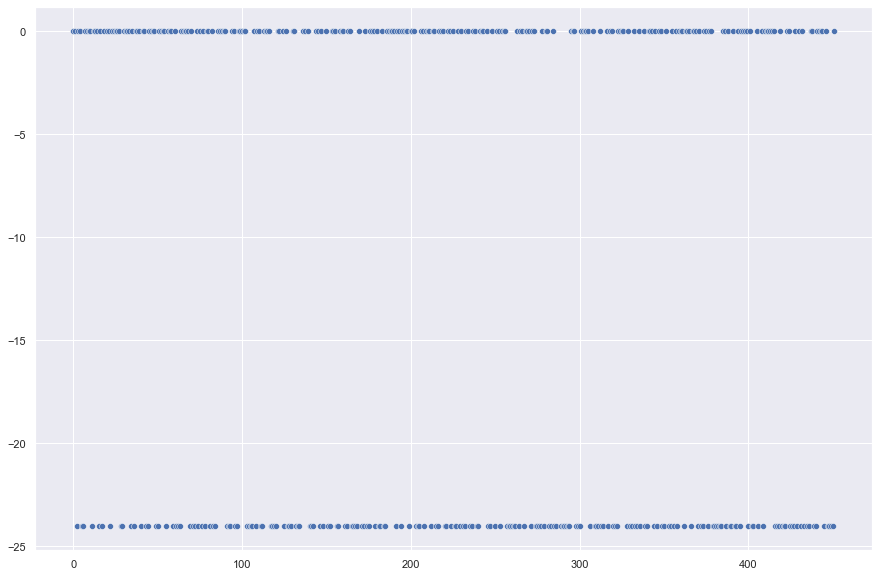

In [31]:
seaborn.scatterplot(data=(sleep_data_df["Computed Duration"]/ numpy.timedelta64(1, 'h')) - sleep_data_df["Sleep duration"])

In [32]:
sleep_data_df[((sleep_data_df["Computed Duration"]/ numpy.timedelta64(1, 'h')) - sleep_data_df["Sleep duration"]) != 0]

,ID,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Computed Duration
2,3,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,-1 days +08:00:00
5,6,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,-1 days +07:30:00
6,7,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28,25,47,2.0,-1 days +06:00:00
11,12,2021-03-10 22:30:00,2021-03-10 06:00:00,7.5,0.93,18,60,22,0.0,-1 days +07:30:00
15,16,2021-12-06 22:00:00,2021-12-06 05:30:00,7.5,0.92,25,55,20,0.0,-1 days +07:30:00
...,...,...,...,...,...,...,...,...,...,...
445,446,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,4.0,-1 days +07:30:00
447,448,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,-1 days +07:30:00
448,449,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,-1 days +06:00:00
449,450,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,-1 days +08:30:00


In [33]:
sleep_data_df[((sleep_data_df["Computed Duration"]/ numpy.timedelta64(1, 'h')) - sleep_data_df["Sleep duration"]) != 0]["Wakeup time"] + pandas.Timedelta(days=1)

2     2021-05-26 05:30:00
5     2021-07-02 04:30:00
6     2021-07-22 03:00:00
11    2021-03-11 06:00:00
15    2021-12-07 05:30:00
              ...        
445   2021-11-17 06:30:00
447   2021-11-14 05:30:00
448   2021-04-01 03:00:00
449   2021-09-08 07:30:00
450   2021-07-30 04:00:00
Name: Wakeup time, Length: 200, dtype: datetime64[ns]

By closer inspection, the wakeup time seems to be off of one day, in some cases, hence we are going to solve the inconsistency by adding one day to the dates that are off:

In [34]:
wrong_indexes = ((sleep_data_df["Computed Duration"]/ numpy.timedelta64(1, 'h')) - sleep_data_df["Sleep duration"]) != 0
sleep_data_df.loc[wrong_indexes,"Wakeup time"] = sleep_data_df.loc[wrong_indexes,"Wakeup time"] + pandas.Timedelta(days=1)

As a sanity check, we are now going to compute againg the same metrics and verify that the inconsistency has been solved:

In [35]:
sleep_data_df["Computed Duration"] = sleep_data_df['Wakeup time'] - sleep_data_df['Bedtime']

<AxesSubplot:>

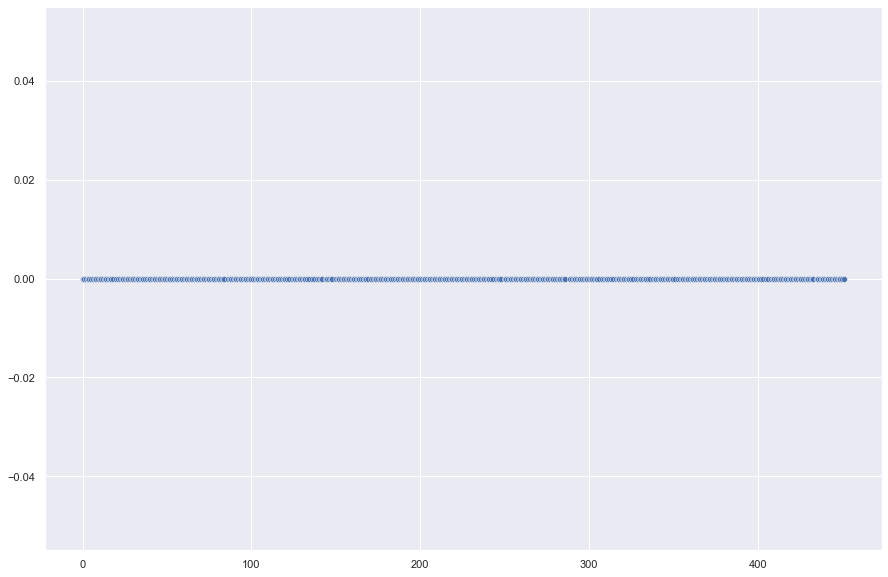

In [36]:
seaborn.scatterplot(data=(sleep_data_df["Computed Duration"]/ numpy.timedelta64(1, 'h')) - sleep_data_df["Sleep duration"])

### Activity 1.6

Perform an internal consitency check: 

- Sleep efficiency should be computed as the sum of two other existing variables, which ones?

- How would you verify your assumption?

In [37]:
sleep_data_df.head()

,ID,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Computed Duration
0,1,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0 days 06:00:00
1,2,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0 days 07:00:00
2,3,2021-05-25 21:30:00,2021-05-26 05:30:00,8.0,0.89,20,70,10,1.0,0 days 08:00:00
3,4,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,0 days 06:00:00
4,5,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0 days 08:00:00


Sleep efficiency is computed as follows:

$$ \text{Sleep Efficiency} = \text{REM sleep percentage} [\%] + \text{Deep sleep percentage} [\%] $$

To obtain the percentages from the actual values of the columns, we need to divide the column values by 100.

If we try to compare using the equality operator $=$, we obtain that the values are different, even though the values should be equal:

In [38]:
sleep_data_df["Sleep efficiency"] == (sleep_data_df["REM sleep percentage"]/100.0 + sleep_data_df["Deep sleep percentage"]/100.0)  

0      False
1      False
2      False
3      False
4      False
       ...  
447    False
448    False
449    False
450    False
451    False
Length: 432, dtype: bool

This happens since floating point numbers are (by design) a lossy representation (due to binary encoding) of the real values.
If we look at the difference between the real value, and the computed value, we realize that their difference is neglibile:

In [39]:
sleep_data_df["Sleep efficiency"] - (sleep_data_df["REM sleep percentage"]/100.0 + sleep_data_df["Deep sleep percentage"]/100.0)  

0      1.110223e-16
1      1.900000e-01
2     -1.000000e-02
3      3.000000e-02
4     -6.000000e-02
           ...     
447    1.200000e-01
448   -1.100000e-01
449    3.000000e-02
450   -1.400000e-01
451    1.800000e-01
Length: 432, dtype: float64

A more appropriate way to determine if they are equal would be to compute their difference and assess whether it is smaller than an arbitarily small threshold $\varepsilon$:

In [40]:
epsilon = 0.1
(sleep_data_df["Sleep efficiency"] - (sleep_data_df["REM sleep percentage"]/100.0 + sleep_data_df["Deep sleep percentage"]/100.0)) < epsilon  

0       True
1      False
2       True
3       True
4       True
       ...  
447    False
448     True
449     True
450     True
451    False
Length: 432, dtype: bool

### Activity 1.7

For further analysis, we would like to have the REM, Deep, and Light sleep durations in minutes instead of percentages.

Create derived features using the available data to represent the requested information.

In [41]:
sleep_data_df["REM sleep duration"] = sleep_data_df["REM sleep percentage"]/100.0 *  sleep_data_df["Sleep duration"] * 60.0
sleep_data_df["Deep sleep duration"] = sleep_data_df["Deep sleep percentage"]/100.0 *  sleep_data_df["Sleep duration"] * 60.0
sleep_data_df["Light sleep duration"] = sleep_data_df["Light sleep percentage"]/100.0 *  sleep_data_df["Sleep duration"] * 60.0

Note that using vectorized operation $*$, we can compute the element-wise product between two columns with a single instruction: 

In [42]:
sleep_data_df.head()

,ID,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Computed Duration,REM sleep duration,Deep sleep duration,Light sleep duration
0,1,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0 days 06:00:00,64.8,252.0,43.2
1,2,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0 days 07:00:00,79.8,117.6,222.6
2,3,2021-05-25 21:30:00,2021-05-26 05:30:00,8.0,0.89,20,70,10,1.0,0 days 08:00:00,96.0,336.0,48.0
3,4,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,0 days 06:00:00,82.8,90.0,187.2
4,5,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0 days 08:00:00,129.6,264.0,86.4


### Activity 1.8 - Merge datasets

Now that all the proper preprocessing have been peformed on the original dataset, you can  proceed with merging `personal_data.csv` and `sleep_data.csv` in a single dataset `sleep_merged_df`.

In [43]:
sleep_merged_df = pandas.merge(sleep_data_df,personal_data_df,on="ID")

Using the two datasets, and the common column `ID` we are able to merge the datasets.
Please note that, since we had to drop the rows with missing values in the `sleep_data_df` dataset, the merged dataset will result with less rows.

In [44]:
sleep_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 431
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   ID                      432 non-null    int64          
 1   Bedtime                 432 non-null    datetime64[ns] 
 2   Wakeup time             432 non-null    datetime64[ns] 
 3   Sleep duration          432 non-null    float64        
 4   Sleep efficiency        432 non-null    float64        
 5   REM sleep percentage    432 non-null    int64          
 6   Deep sleep percentage   432 non-null    int64          
 7   Light sleep percentage  432 non-null    int64          
 8   Awakenings              432 non-null    float64        
 9   Computed Duration       432 non-null    timedelta64[ns]
 10  REM sleep duration      432 non-null    float64        
 11  Deep sleep duration     432 non-null    float64        
 12  Light sleep duration    432 non-null

## Activity 2 - Regression analysis

With the merged datasets, we would like to perform regression analysis, mostly for two purposes:

- Confirm the existence of relationships between the variables
- Discover the existence of new relationships between the variables


## Activity 2.1 - Regression on known relationship

Perform a linear regression analysis for:
- $y$ : Sleep efficiency
- $X$ : REM sleep percentage , Deep sleep percentage , Light sleep percentage

using the [pingouin library](https://pingouin-stats.org/build/html/index.html)

What result would you expect from the linear regression?[
Check the p-values for the different coefficient, is any of them significant?

For more information about how to interpret results, please have a look [here](https://www.statology.org/read-interpret-regression-table/)


In [45]:
import pingouin as pg # If not installed, please run pip install pingouin in a terminal to install it

In [46]:
# Using a Pandas DataFrame `df`:
X = sleep_merged_df[['REM sleep percentage', 'Deep sleep percentage','Light sleep percentage']]
y = sleep_merged_df['Sleep efficiency']
linear_regression_known = pg.linear_regression(X,y)
# Using a NumPy array:
#lm = pg.linear_regression(X, y)

C:\Users\jdestefani\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\regression.py:420: UserWarning: Design matrix supplied with `X` parameter is rank deficient (rank 3 with 4 columns). That means that one or more of the columns in `X` are a linear combination of one of more of the other columns.
  warnings.warn(


In [47]:
linear_regression_known

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.000223,0.000004,61.056763,1.107578e-213,0.67095,0.669416,0.000216,0.000230
1,REM sleep percentage,0.011093,0.000820,13.528613,5.566878e-35,0.67095,0.669416,0.009482,0.012705
2,Deep sleep percentage,0.009244,0.000250,36.940610,2.409900e-135,0.67095,0.669416,0.008753,0.009736
3,Light sleep percentage,0.001973,0.000303,6.516411,2.022943e-10,0.67095,0.669416,0.001378,0.002568


The resulting expression from the linear regression is:

$$ \text{Sleep efficiency} = 0.000223 +  0.011093 * \text{REM sleep percentage} + 0.009244 * \text{Deep sleep percentage} + 0.001973 * \text{Light sleep percentage} \sim \text{REM sleep percentage}/100 + \text{Deep sleep percentage}/100 $$

The p-value for all the coefficients is $<0.001$, indicating the statistical significance of proposed regression relationship.

## Activity 2.2 - Regression on unknown relationship

Perform a linear regression analysis for:
- $y$ : Sleep efficiency
- $X$ : Age, Caffeine consumption, Alcohol consumption, Exercise frequency

using the [pingouin library](https://pingouin-stats.org/build/html/index.html)

What result would you expect from the linear regression?

Check the p-values for the different coefficient, is any of them significant?

For more information about how to interpret results, please have a look [here](https://www.statology.org/read-interpret-regression-table/)


In [48]:
# Using a Pandas DataFrame `df`:
X = sleep_merged_df[['Age', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']]
y = sleep_merged_df['Sleep efficiency']
linear_regression_unknown = pg.linear_regression(X,y)

In [49]:
linear_regression_unknown

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.727774,0.021096,34.498002,1.524112e-125,0.234736,0.227568,0.686309,0.769239
1,Age,0.001218,0.000441,2.759657,6.035185e-03,0.234736,0.227568,0.000350,0.002085
2,Caffeine consumption,0.000325,0.000196,1.653349,9.899479e-02,0.234736,0.227568,-0.000061,0.000710
3,Alcohol consumption,-0.032605,0.003589,-9.083658,3.939373e-18,0.234736,0.227568,-0.039661,-0.025550
4,Exercise frequency,0.023566,0.004032,5.844737,1.008380e-08,0.234736,0.227568,0.015641,0.031491


The resulting expression from the linear regression is:

$$ \text{Sleep efficiency} = 0.011093 * \text{Age} + 0.001090 * \text{Caffeine consumption} -0.031779 * \text{Alcohol consumption} + 0.023586 * \text{Exercise frequency} $$

In this case, `Alcohol consumption` seems to negatively impact sleep efficiency, while `Exercise frequency` seems to positively impact it. 
The p-value for their coefficients is $<0.001$, indicating the statistical significance of proposed regression relationship.

On the other hand, given the reduced values of the coefficients for Age and Caffeine consumption, as well as their higher p-value, we cannot make similar conclusions about the impact of these variables.

## Activity 2.3 - Regression on unknown relationship with categorical variable

Perform a linear regression analysis for:
- $y$ : Sleep efficiency
- $X$ : Age, Caffeine consumption, Alcohol consumption, Exercise frequency, Smoking status

using the [pingouin library](https://pingouin-stats.org/build/html/index.html)

What result would you expect from the linear regression?

Check the p-values for the different coefficient, is any of them significant?

For more information about how to interpret results, please have a look [here](https://www.statology.org/read-interpret-regression-table/)

In [50]:
# Using a Pandas DataFrame `df`:
X = sleep_merged_df[['Age', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency','Smoking status']]
y = sleep_merged_df['Sleep efficiency']
linear_regression_unknown = pg.linear_regression(X,y)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Linear regression as is will not work with categorical variables, hence we will need to perform some transformations.
For the time being, we will be not completing this part, but how to handle categorical variables will be treated during Lecture 5.

## Activity 3 - Correlation analysis

Last but not least, we would assess the presence of a correlation between the existing variables, in order to determine:

- Is any of the predictors $X$ correlated with the target variable to predict $y$?
- Are any of the predictors $X$ correlated with each other?

### Activity 3.1 - Correlation computation

Compute the correlation between the following (numerical) variables: `'Age', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency','REM sleep percentage', 'Deep sleep percentage','Light sleep percentage','Sleep efficiency'` 

In [51]:
numeric_columns=['Age', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency','REM sleep percentage', 'Deep sleep percentage','Light sleep percentage','Sleep efficiency']
sleep_merged_df[numeric_columns].corr(method='spearman')

,Age,Caffeine consumption,Alcohol consumption,Exercise frequency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Sleep efficiency
Age,1.000000,-0.179560,0.060585,0.066167,0.030644,-0.022594,0.029414,0.090848
Caffeine consumption,-0.179560,1.000000,-0.043898,-0.146432,0.110256,0.001084,-0.028117,0.043717
Alcohol consumption,0.060585,-0.043898,1.000000,-0.042103,-0.040337,-0.331061,0.334024,-0.370467
Exercise frequency,0.066167,-0.146432,-0.042103,1.000000,0.036124,0.103582,-0.130065,0.283910
REM sleep percentage,0.030644,0.110256,-0.040337,0.036124,1.000000,-0.413932,0.045762,0.092925
Deep sleep percentage,-0.022594,0.001084,-0.331061,0.103582,-0.413932,1.000000,-0.881719,0.536645
Light sleep percentage,0.029414,-0.028117,0.334024,-0.130065,0.045762,-0.881719,1.000000,-0.554938
Sleep efficiency,0.090848,0.043717,-0.370467,0.283910,0.092925,0.536645,-0.554938,1.000000


The `corr` function computes the pairwise correlation between the different variables and report the results as a correlation matrix.
Please note that by definition, each variable is positively correlated with itself (correlation == 1).
However, this format is not the most appropriate for detecting the intensity of the correlation.
For this reason, we will rely on a heatmap.

### Activity 3.2 - Correlation visualization

Visualize the correlation using a [Seaborn heatmap](https://seaborn.pydata.org/).

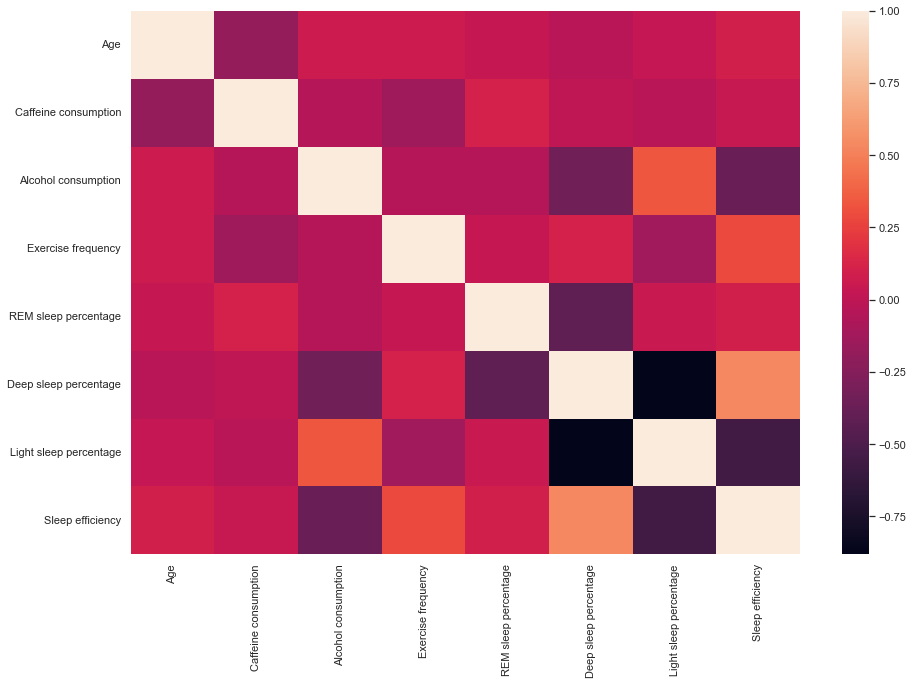

In [52]:
seaborn.heatmap(sleep_merged_df[numeric_columns].corr(method='spearman'));

The correlation analysis confirms the results of the regression analysis:
- `Alcohol consumption` and ` Light sleep percentage` are negatively correlated with `Sleep Efficiency`.
- `Excercise frequency` and `Deep sleep percentage` seems to be positively correlated with `Sleep Efficiency`.
- `Age` and `Caffeine consumptuion` seems to have no correlation with `Sleep Efficiency`

### Activity 3.3. - Correlation testing

Perform a statistical testing using the `pearsonr` and `spearmanr` functions from the [Scipy.stats library]([https://docs.scipy.org/doc/scipy/reference/stats.html) library between `Alcohol consumption` and `Sleep efficiency` and discuss the obtained results.

In [53]:
from scipy.stats import pearsonr, spearmanr, kendalltau

In [54]:
r = pearsonr(sleep_merged_df['Alcohol consumption'], sleep_merged_df['Sleep efficiency'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: -0.39331566018221137 p-value: 1.9612228534912217e-17


In [55]:
r = spearmanr(sleep_merged_df['Alcohol consumption'], sleep_merged_df['Sleep efficiency'])
print('Spearman correlation:', r[0], 'p-value:', r[1])

Spearman correlation: -0.37046703190052244 p-value: 1.6819704380831208e-15


Both Spearman and Pearson correlation statistical testing confirms the statistical significance of a negative correlation between `Alcohol consumption` and `Sleep efficiency`

# Supplementary exercise - Correlation analysis with outliers

For deepening your knowledge about correlation, and more precisely, correlation between categorical variables, and between categorical and numerical variables, you can explore this resource, translated from [Emstrakov Kaggle Notebook](https://www.kaggle.com/code/emstrakhov/lesson-2-correlation-analysis)


## EDA: data understanding, visual and correlation analysis

The purpose of this lecture will be to continue learning the practical foundations of exploratory analysis using the Pandas library --- data grouping, counting, visualization, working with missing values. We will also get acquainted with the analysis of correlations between features and statistical tests.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [57]:
df = pd.read_csv('data/supplementary/cardio_train.csv', sep=';', index_col=0)

In [58]:
df.head().T

id,0,1,2,3,4
age,18393.0,20228.0,18857.0,17623.0,17474.0
gender,2.0,1.0,1.0,2.0,1.0
height,168.0,156.0,165.0,169.0,156.0
weight,62.0,85.0,64.0,82.0,56.0
ap_hi,110.0,140.0,130.0,150.0,100.0
ap_lo,80.0,90.0,70.0,100.0,60.0
cholesterol,1.0,3.0,3.0,1.0,1.0
gluc,1.0,1.0,1.0,1.0,1.0
smoke,0.0,0.0,0.0,0.0,0.0
alco,0.0,0.0,0.0,0.0,0.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


The results of applying the info() method showed that this dataset contains only numeric features. However, this should not mislead the researcher: categorical features are often encoded by numbers. Moreover, in order to build machine learning models, **all** features must be numeric.

For example, traits such as **gender**, **smoke**, **alco**, **active**, and the target trait **cardio** are **categorical**. In the table, the values of these features are encoded by numbers, but on the sets of these numbers, the order relations (greater than, less than, greater than or equal to, less than or equal to) do not make sense.

The features **cholesterol** and **gluc** refer to **ordinal** features, i.e., category conventions for which an order relation makes sense. For example, **cholesterol=1** means **lower** cholesterol than **cholesterol=2**.

All other features can be treated as **numeric continuous** (despite the fact that some of them are represented only by integers).

Let's single out numerical features in a separate group and consider some of the simplest types of correlation analysis of such data.

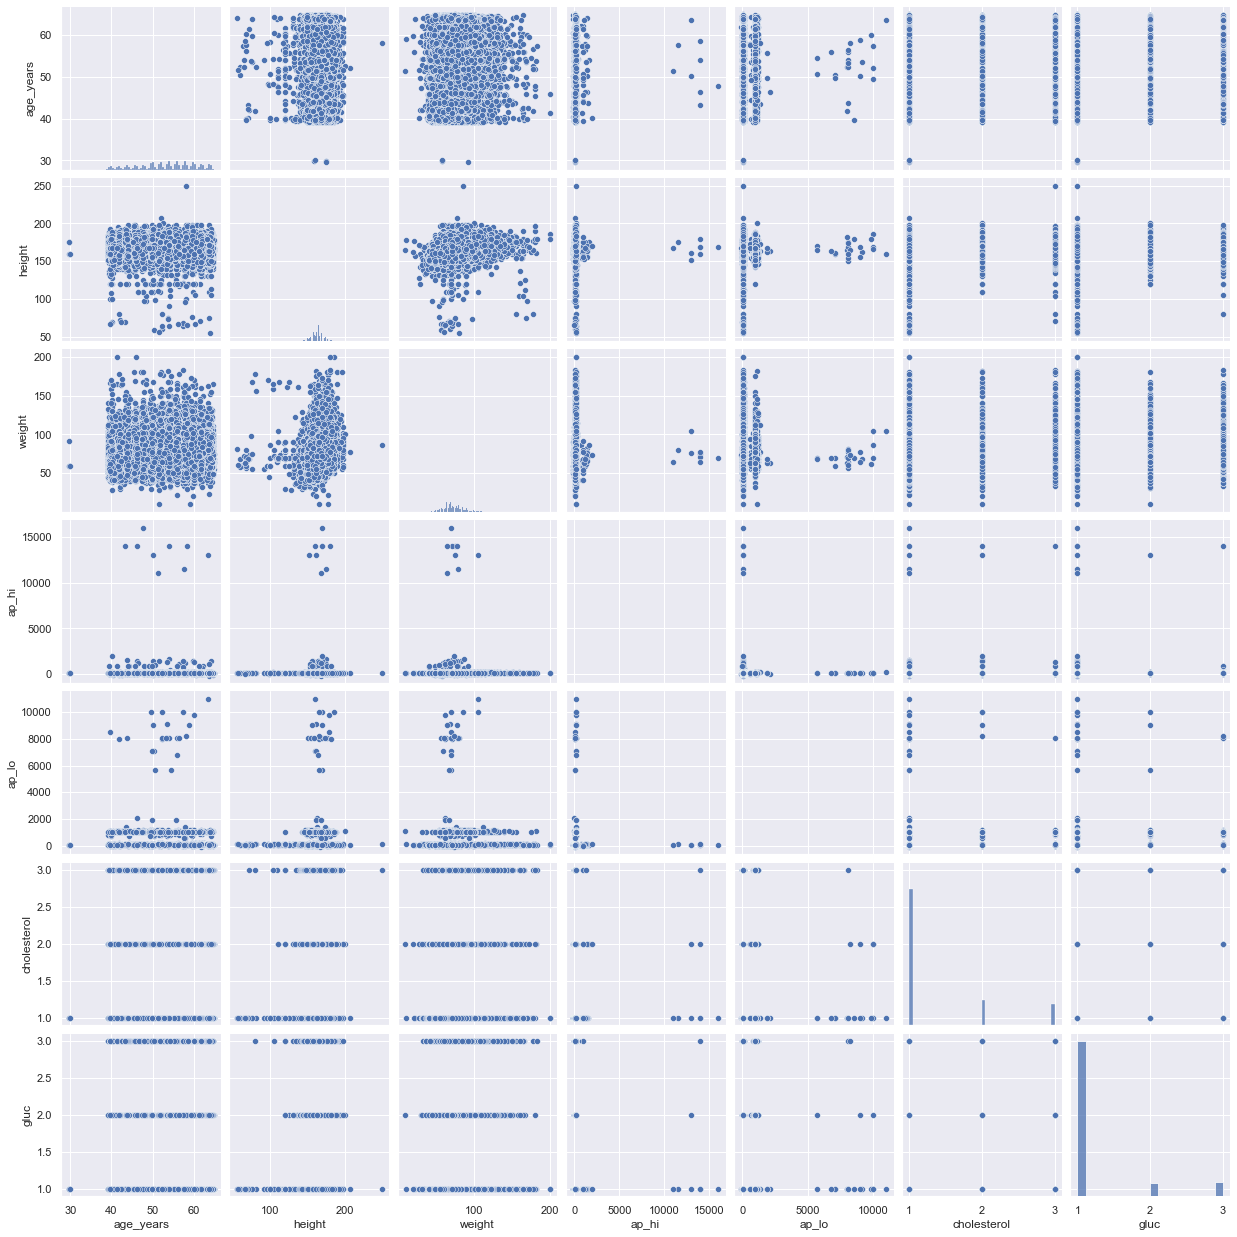

In [60]:
df['age_years'] = df['age'] / 365.25 # возраст в годах
numeric = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
sns.pairplot(df[numeric]);

Вспомним, что в данных есть выбросы --- явно некорректные значения, которые будут мешать дальнейшей работе. Удалим их.

Recall that there are outliers in the data --- clearly incorrect values that will interfere with further work. Let's delete them.

C:\Users\jdestefani\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


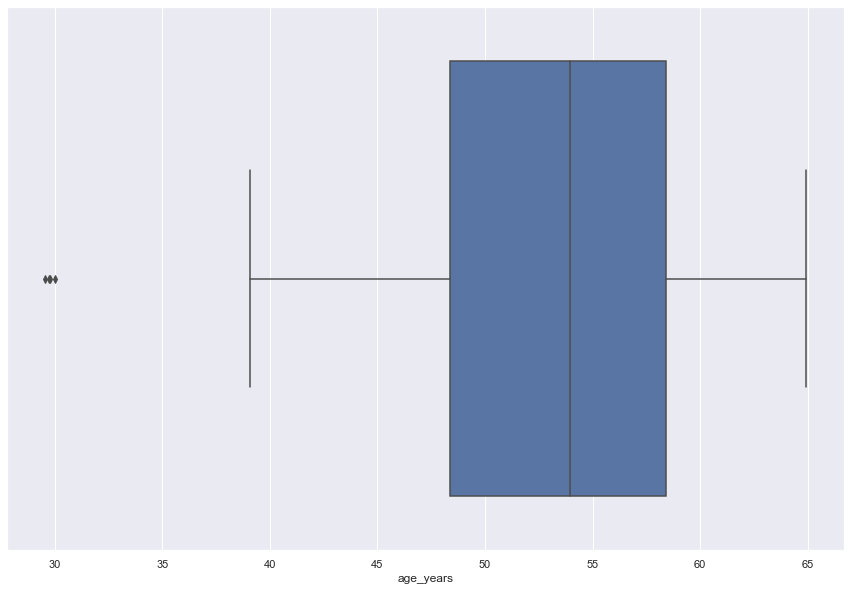

In [61]:
sns.boxplot(df['age_years']);

C:\Users\jdestefani\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


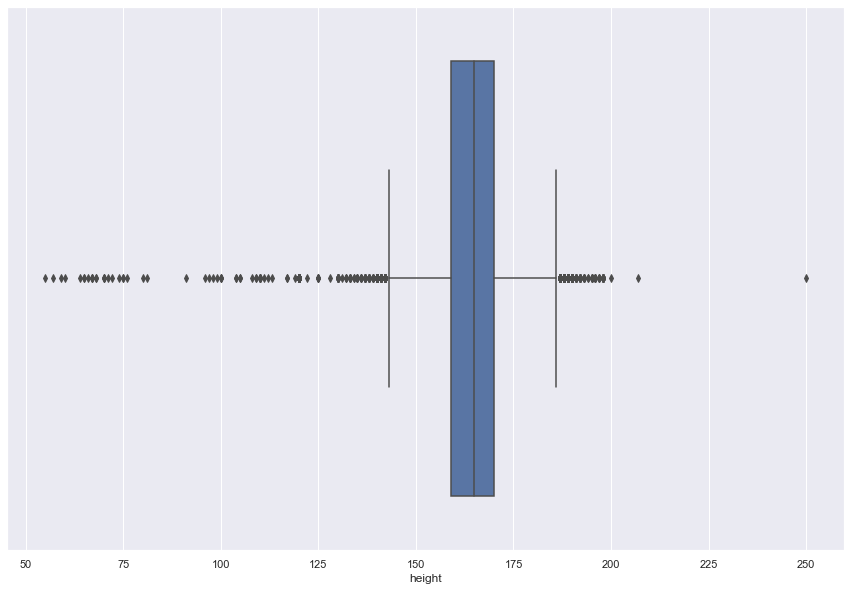

In [62]:
sns.boxplot(df['height']);

C:\Users\jdestefani\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


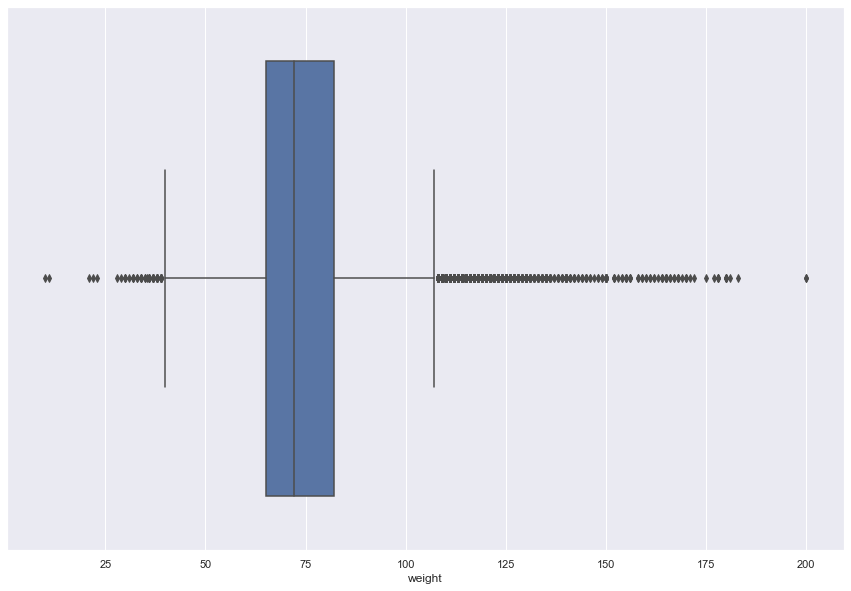

In [63]:
sns.boxplot(df['weight']);

C:\Users\jdestefani\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


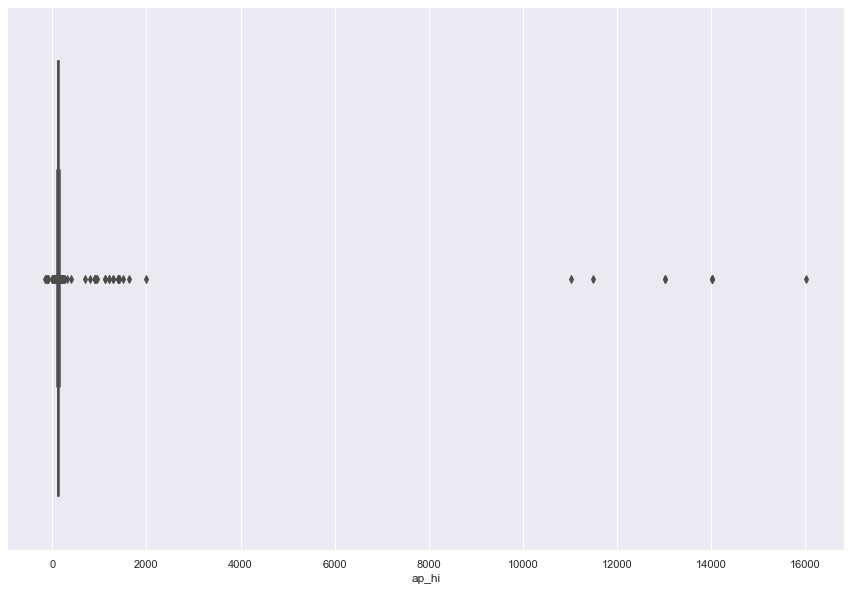

In [64]:
sns.boxplot(df['ap_hi']);

C:\Users\jdestefani\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


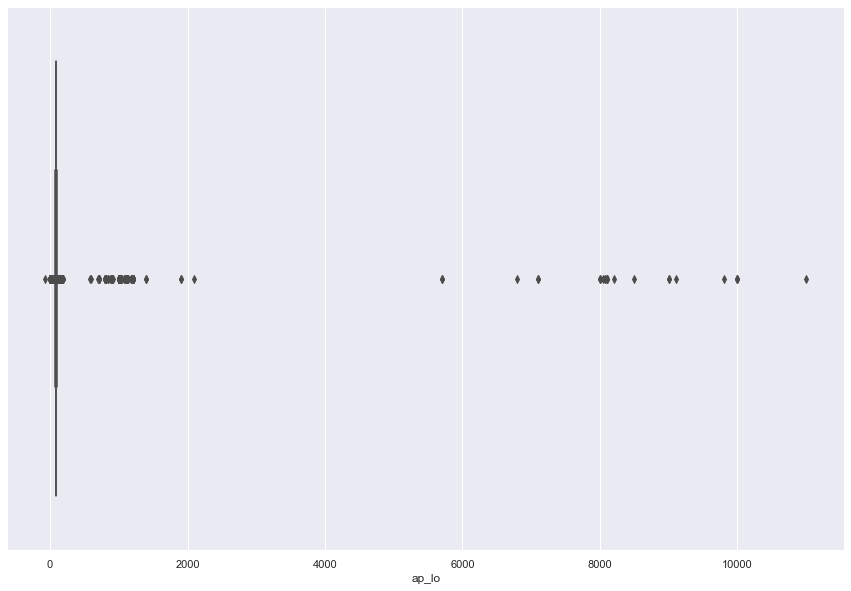

In [65]:
sns.boxplot(df['ap_lo']);

In [66]:
def outliers_indices(feature):
    '''
    Будем считать выбросами все точки, выходящие за пределы трёх сигм.
    '''
    mid = df[feature].mean()
    sigma = df[feature].std()
    return df[(df[feature] < mid - 3*sigma) | (df[feature] > mid + 3*sigma)].index

In [67]:
wrong_height = outliers_indices('height')
wrong_weight = outliers_indices('weight')
wrong_hi = outliers_indices('ap_hi')
wrong_lo = outliers_indices('ap_lo')

out = set(wrong_height) | set(wrong_weight) | set(wrong_hi) | set(wrong_lo)

print(len(out))

1929


1929 outliers will be removed from the data set, which is not significant in this case.

In [68]:
df.drop(out, inplace=True)

Let's build Spearman's correlation matrix for numerical features without taking into account outlier objects.

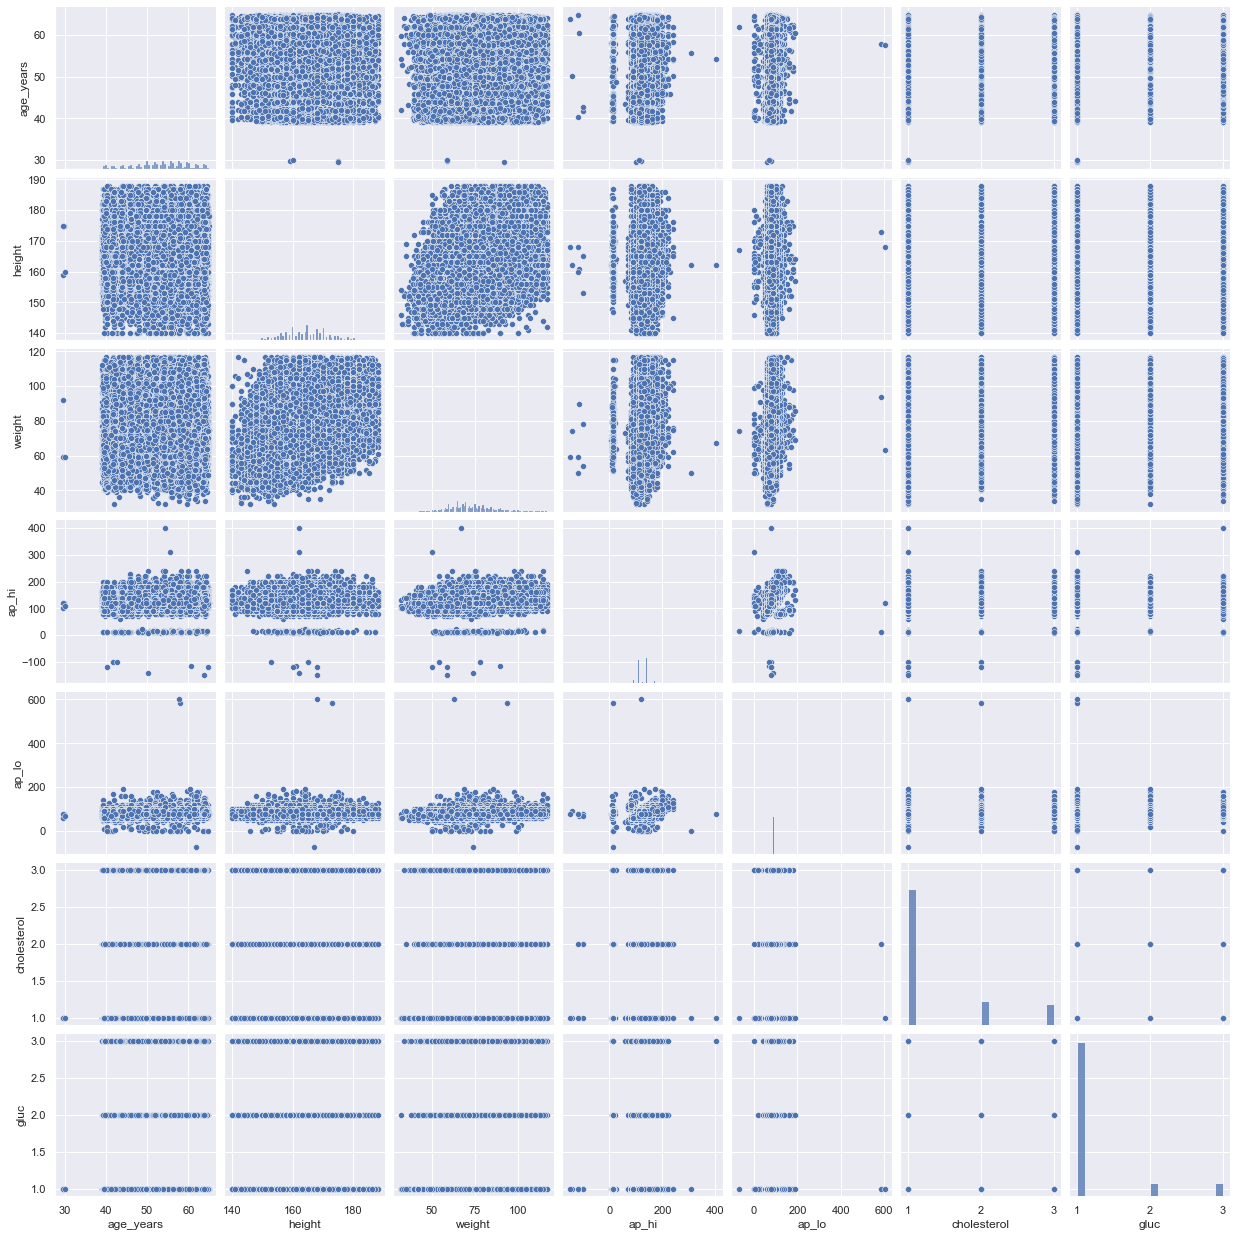

In [69]:
sns.pairplot(df[numeric]);

In [70]:
df[numeric].corr(method='spearman')

,age_years,height,weight,ap_hi,ap_lo,cholesterol,gluc
age_years,1.000000,-0.080755,0.066402,0.223776,0.160284,0.142255,0.092413
height,-0.080755,1.000000,0.312419,0.017144,0.028388,-0.062429,-0.026099
weight,0.066402,0.312419,1.000000,0.269200,0.246267,0.132306,0.103824
ap_hi,0.223776,0.017144,0.269200,1.000000,0.728927,0.205921,0.101733
ap_lo,0.160284,0.028388,0.246267,0.728927,1.000000,0.164351,0.079457
cholesterol,0.142255,-0.062429,0.132306,0.205921,0.164351,1.000000,0.405530
gluc,0.092413,-0.026099,0.103824,0.101733,0.079457,0.405530,1.000000


The [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function of the Seaborn library provides a convenient way to visualize such matrices.

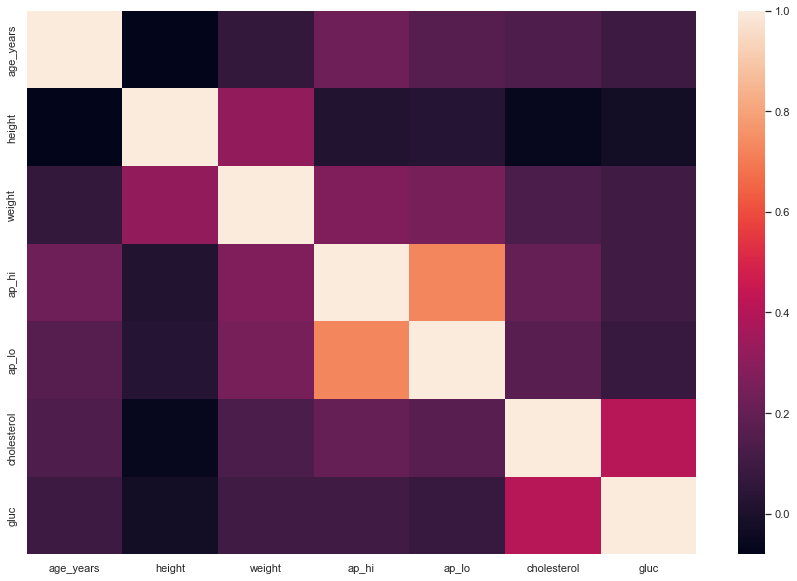

In [71]:
sns.heatmap(df[numeric].corr(method='spearman'));

What conclusions can be drawn? The highest correlation is observed between the variables **ap_hi** and **ap_lo**. The correlation between height and weight, as well as cholesterol and glucose levels, is quite high. In addition, it can be seen that weight is more related to pressure than height.

## Statistical tests

It was said above that the correlation between height and weight is _quite high_, and _weight is more related to pressure than height_. The time has come to give a more rigorous color to our conclusions. Let's talk about the **statistical significance** of the identified relationships. In other words, **how high** must the degree of correlation be to be able to talk about any **non-random relationship** between features at all?

### The stats module of the SciPy library

The [stats](https://docs.scipy.org/doc/scipy/reference/stats.html) module of the SciPy library contains several built-in functions for calculating correlation coefficients between features of different nature, as well as testing them for statistical significance.

In [72]:
from scipy.stats import pearsonr, spearmanr, kendalltau
r = pearsonr(df['height'], df['weight'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.31428736613625996 p-value: 0.0


In [73]:
r = pearsonr(df['cholesterol'], df['weight'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.1378005108534954 p-value: 9.348547578451872e-286


In [74]:
r = spearmanr(df['cholesterol'], df['weight'])
print('Spearman correlation:', r[0], 'p-value:', r[1])

Spearman correlation: 0.13230579095093412 p-value: 2.1550632494593984e-263


Since the p-value < 0.05 (typical threshold), we conclude that the relationship (correlation) between height and weight is **statistically significant**.

Let's check whether the correlation of height and pressure is really statistically insignificant, in contrast to the correlation of weight and pressure. Let's use Pearson's correlation coefficient again.

In [75]:
r_height_pressure = pearsonr(df['height'], df['ap_hi'])
print('Height vs. Pressure:', r_height_pressure)
r_weight_pressure = pearsonr(df['weight'], df['ap_hi'])
print('Weight vs. Pressure:', r_weight_pressure)

Height vs. Pressure: (0.010717520992153062, 0.005169536660391454)
Weight vs. Pressure: (0.24423383377174285, 0.0)


As you can see, the p-values in both cases are quite small, so we have **no reason** to say that there is no **statistically proven relationship** between growth and pressure. The fact that the value of $r=0.01$ turned out to be significant may be due to the large sample length. However, in any case, the correlation between pressure and height is significantly less than the correlation between pressure and weight.

## Analysis of correlations of categorical features

Correlation between categorical variables cannot be measured using the Pearson, Spearman, and Kendall coefficients. Coefficients and inferences for categorical data are usually built on the basis of **contingency tables** (cross-tabs, contingency tables).

Consider the relationship between smoking and cardiovascular disease. Let's build a cross table.

In [76]:
pd.crosstab(df['smoke'], df['cardio'])

cardio,0,1
smoke,,
0,31348,30787
1,3175,2761


At this stage, it's hard to say anything. Let's try to calculate the coefficient $\chi^2$.

In [77]:
from scipy.stats import chi2_contingency, fisher_exact
chi2_contingency(pd.crosstab(df['smoke'], df['cardio']))

(19.85673527332828,
 8.34681250322075e-06,
 1,
 array([[31512.48850465, 30622.51149535],
        [ 3010.51149535,  2925.48850465]]))

A low p-value indicates that the relationship is statistically confirmed. In this case, smokers have a lower propensity for CVD. The same conclusion is confirmed by the Fisher test.

In [78]:
fisher_exact(pd.crosstab(df['smoke'], df['cardio']))

(0.885452245029283, 7.799832072146025e-06)

For $2\times 2$ contingency tables, there are also other indicators of the degree of closeness of statistical connection: association coefficient, contingency coefficient, collage coefficient, Goodman-Kruskal coefficient.

## Relationship between categorical and numerical features

In the case of a binary categorical feature and a numeric feature, we can apply a biserial correlation coefficient. For example, consider the relationship between weight and cardiovascular disease.

In [79]:
from scipy.stats import pointbiserialr
pointbiserialr(df['cardio'], df['weight'])

PointbiserialrResult(correlation=0.17891971905824355, pvalue=0.0)

And again the connection was confirmed.